In [38]:
import numpy as np
import pandas as pd

In [47]:
np.random.seed(23)

mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df1 = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 1

mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)


df2 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df2['target'] = 0


df = pd.concat([df1, df2], ignore_index=True)

In [48]:
df.sample(40)

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1
29,1.425140,1.441152,0.182561,0
31,2.224431,0.230401,1.192120,0
4,0.322272,0.060343,-1.043450,1
32,-0.723253,1.461259,-0.085367,0
33,2.823378,-0.332863,2.637391,0


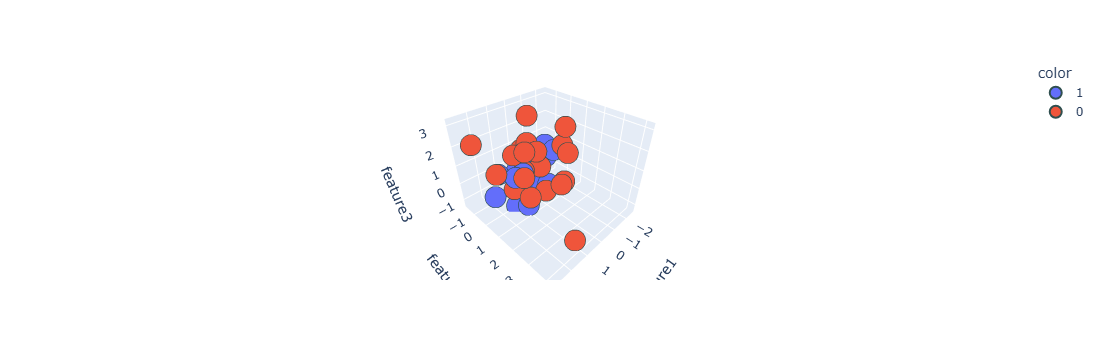

In [49]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3',
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

# 1. Applying StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df.iloc[:, 0:3] = scaler.fit_transform(df.iloc[:, 0:3])

# 2. Finding Covariance Matrix

In [51]:
covariance_mat = np.cov([df.iloc[:,0], df.iloc[:,1], df.iloc[:,2]])
print("Covariance Matrix :\n", covariance_mat)

Covariance Matrix :
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [52]:
df.iloc[:,:3].cov()

,feature1,feature2,feature3
feature1,1.025641,0.204781,0.080118
feature2,0.204781,1.025641,0.198389
feature3,0.080118,0.198389,1.025641


# 3. Finding EigenValues and EigenVectors

In [53]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_mat)
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [54]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [55]:
pc = eigen_vectors[:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [56]:
transformed_df = np.dot(df.iloc[:,:3], pc.T)
transformed_df

array([[-0.42938381,  0.82926458],
       [-1.12452035,  0.84222628],
       [ 0.59943321,  1.79586208],
       [-0.09455622, -0.76156564],
       [-0.40154161,  1.20306094],
       [ 0.88673295,  0.52266372],
       [ 1.6316766 ,  1.89452651],
       [-0.27873196, -0.44758065],
       [ 0.68860521,  0.65808377],
       [-0.99740761,  0.77893827],
       [-0.43477695, -0.6038357 ],
       [-0.62158585,  0.02311035],
       [ 1.56728555,  1.73096695],
       [ 0.62395294,  0.0883712 ],
       [-0.27187555,  0.49822203],
       [-0.47844383,  0.77437194],
       [ 0.7417154 ,  1.02382203],
       [-0.1445586 ,  0.49489533],
       [ 1.72611407,  0.49251144],
       [ 1.30454939,  0.47664493],
       [ 0.23211323, -1.15324986],
       [ 0.48480244, -1.21770771],
       [-3.36771525, -0.25462736],
       [-0.22079684, -1.44191108],
       [-1.34882334, -0.53611868],
       [-0.06917835, -0.13099355],
       [-0.13833107, -0.36837179],
       [-0.75789038, -2.42261536],
       [ 1.46433614,

In [58]:
new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,-0.429384,0.829265,1
1,-1.124520,0.842226,1
2,0.599433,1.795862,1
3,-0.094556,-0.761566,1
4,-0.401542,1.203061,1


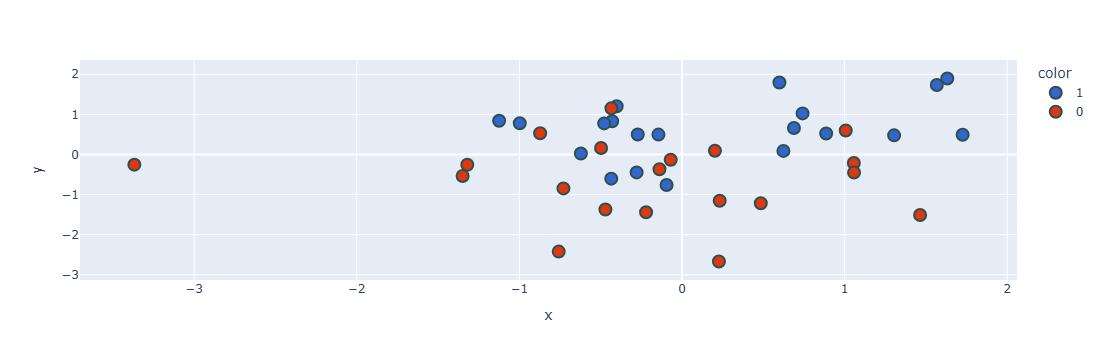

In [59]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     